# Calour microbiome databases interface tutorial

## Setup

In [1]:
import calour as ca

In [2]:
ca.set_log_level(11)

In [3]:
%matplotlib notebook

## Load the data
We will use the Chronic faitigue syndrome data from:

Giloteaux, L., Goodrich, J.K., Walters, W.A., Levine, S.M., Ley, R.E. and Hanson, M.R., 2016.

Reduced diversity and altered composition of the gut microbiome in individuals with myalgic encephalomyelitis/chronic fatigue syndrome.

Microbiome, 4(1), p.30.

In [4]:
cfs=ca.read_amplicon('data/chronic-fatigue-syndrome.biom',
                     'data/chronic-fatigue-syndrome.sample.txt',
                     normalize=10000,min_reads=1000)

2020-09-11 20:17:25 INFO loaded 87 samples, 2129 features
2020-09-11 20:17:25 WARNING These have metadata but do not have data - dropped (1): {'ERR1331814'}
2020-09-11 20:17:25 WARNING Do you forget to normalize your data? It is required before running this function
2020-09-11 20:17:25 INFO After filtering, 87 remain.


## preprocess
remove non-interesting bacteria, cluster bacteria and sort samples by disease status

In [5]:
cfs=cfs.filter_sum_abundance(10)

2020-09-11 20:17:25 INFO After filtering, 1100 remain.


In [6]:
cfs=cfs.cluster_features()

2020-09-11 20:17:25 INFO After filtering, 1100 remain.


In [7]:
cfs=cfs.sort_samples('Subject')

## Viewing database annotations
in the interactive heatmap, when clicking on a bacteria, we get a list of all database results about the selected bacteria.

We can choose which databases to use by the `databases=['dbbact',...]` parameter. The possible databases depend on which database modules were installed.

Currently, supported microbiome database interfaces include:

* dbBact - a community database for manual annotations about bacteria (interface installation instruction at [dbbact-calour](https://github.com/amnona/dbbact-calour)).

* SpongeEMP - an automatic database for sea sponge samples (interface installation instruction at [spongeworld-calour](https://github.com/amnona/spongeworld-calour)).

* phenoDB - phenotypic information about selected bacteria (interface installation instruction at [pheno-calour](https://github.com/amnona/pheno-calour)).

By default, calour uses the dbBact database for microbiome data

<IPython.core.display.Javascript object>


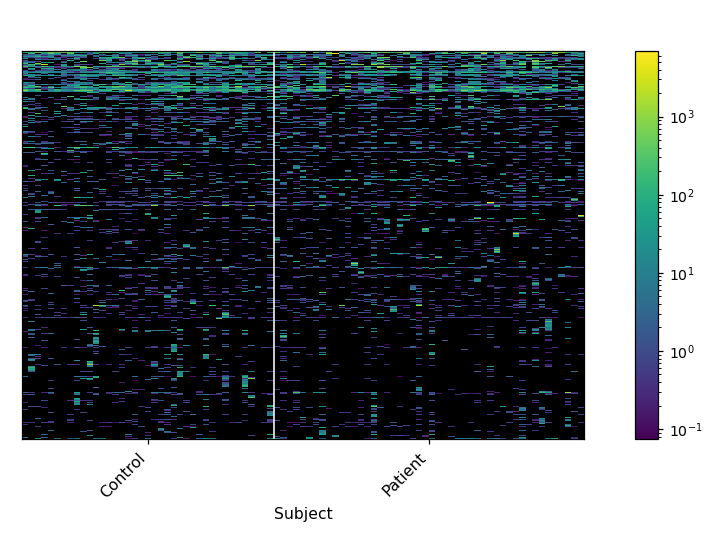

/beegfs/git/calour/calour/heatmap/heatmap.py:309: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  cmap.set_bad(bad_color)


Label(value='0 features are selected')

HTML(value='no annotation found', layout=Layout(height='100px', overflow_y='auto'))

In [8]:
cfs.plot(sample_field='Subject',gui='jupyter')

## dbBact enrichment of selected bacteria
By selecting a set of bacteria (using the shift+click or ctrl+click) and choosing the "Enrichment" button, we can get a list of terms that are significantly enriched in the selected bacteria compared to the rest of the bacteria in the plot

## Adding dbBact annotations
(Only possible using the `gui='qt5'` GUI)

To add a new annotation to the selected set of bacteria, choose the "Annotate" button.

Detailed instructions are available at the dbBact.org website.

## Differential abundance
To find the bacteria significantly different between samples with 'Control' (healthy) and 'Patient' (sick) in the 'Subject' field.

In [9]:
dd=cfs.diff_abundance(field='Subject',val1='Control',val2='Patient', random_seed=2018)

2020-09-11 20:17:26 INFO 87 samples with both values
2020-09-11 20:17:26 INFO After filtering, 1100 remain.
2020-09-11 20:17:26 INFO 39 samples with value 1 (['Control'])
2020-09-11 20:17:27 INFO number of higher in Control: 35. number of higher in Patient : 17. total 52


### Plot the significant bacteria
When clicking on a bacteria, we'll get both dbBact, SpongeEMP, and phenoDB information

<IPython.core.display.Javascript object>


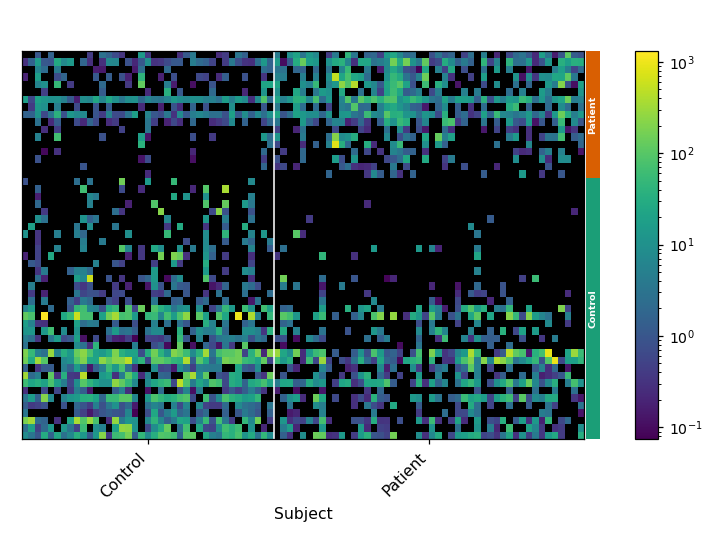

2020-09-11 20:17:27 WARNING Database interface spongeworld_calour not installed.
Skipping.
You can install the database using:
pip install git+git://github.com/amnona/spongeworld-calour
For details see: www.spongeemp.com/main


Label(value='0 features are selected')

HTML(value='no annotation found', layout=Layout(height='100px', overflow_y='auto'))

In [10]:
dd.plot(sample_field='Subject', gui='jupyter', databases=['dbbact','sponge'],bary_fields=['_calour_direction'])

## dbBact term enrichment (`diff_abundance_enrichment`)
We can ask what is special in the bacteria significanly higher in the Control vs. the Patient group and vice versa.

* Note since we need to get the per-feature annotations from dbBact, we need a live internet connection to run this command.

### Default parameters

2020-09-11 20:17:28 INFO Getting dbBact annotations for 52 sequences, please wait...
2020-09-11 20:17:33 INFO got 868 annotations
2020-09-11 20:17:33 INFO Got 5878 annotation-sequence pairs
2020-09-11 20:17:33 INFO Added annotation data to experiment. Total 868 annotations, 52 terms


<IPython.core.display.Javascript object>


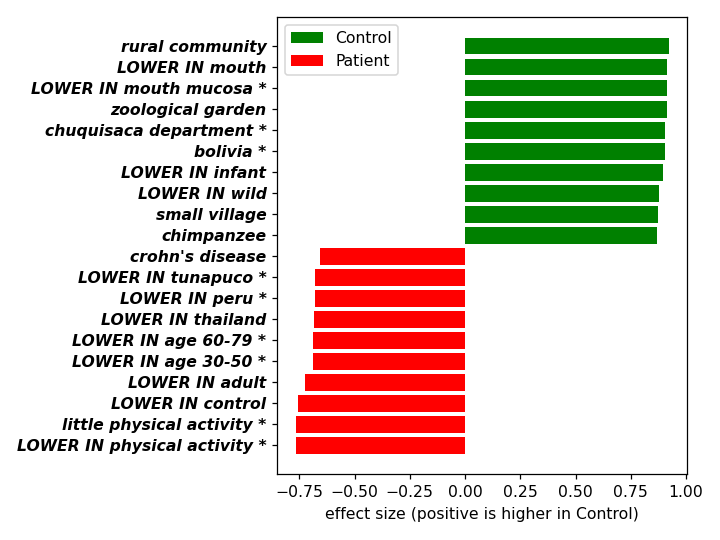

In [11]:
ax, enriched=dd.plot_diff_abundance_enrichment()

The enriched terms are in a calour experiment class (terms are features, bacteria are samples), so we can see the
list of enriched terms with the p-value (pval) and effect size (odif)

In [12]:
enriched.feature_metadata

,term,odif,pvals,num_enriched_exps,num_total_exps
LOWER IN physical activity *,LOWER IN physical activity *,-0.764706,0.000999,-1.0,-1.0
little physical activity *,little physical activity *,-0.764706,0.000999,-1.0,-1.0
LOWER IN control,LOWER IN control,-0.756303,0.000999,-1.0,-1.0
LOWER IN adult,LOWER IN adult,-0.726050,0.000999,-1.0,-1.0
LOWER IN age 30-50 *,LOWER IN age 30-50 *,-0.689076,0.000999,-1.0,-1.0
...,...,...,...,...,...
bolivia *,bolivia *,0.904202,0.000999,-1.0,-1.0
zoological garden,zoological garden,0.912605,0.000999,-1.0,-1.0
LOWER IN mouth,LOWER IN mouth,0.914286,0.000999,-1.0,-1.0
LOWER IN mouth mucosa *,LOWER IN mouth mucosa *,0.914286,0.000999,-1.0,-1.0


We can plot the enriched terms heatmap to see the term scores for each bacteria.

Note now rows are the bacteria and columns are the terms

<IPython.core.display.Javascript object>


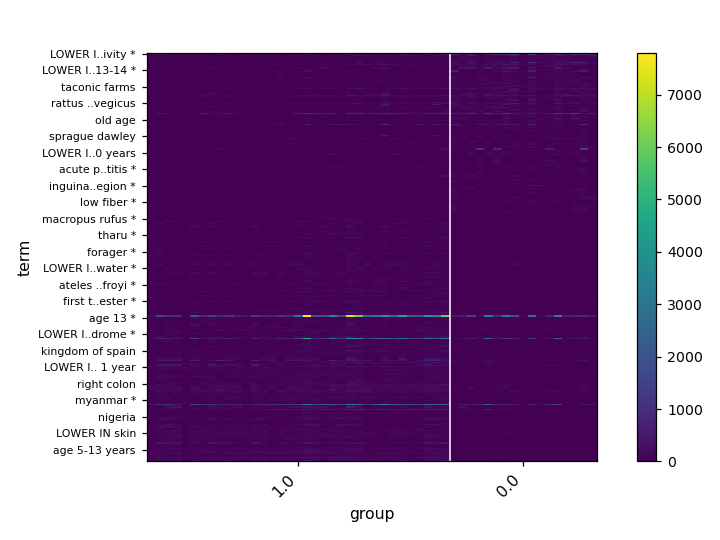

/beegfs/git/calour/calour/heatmap/heatmap.py:309: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  cmap.set_bad(bad_color)


Label(value='0 features are selected')

HTML(value='no annotation found', layout=Layout(height='100px', overflow_y='auto'))

In [13]:
enriched.plot(gui='jupyter', databases=[], feature_field='term',sample_field='group',
              yticklabel_kwargs={'rotation': 0, 'size': 7})

## Look at the behavior of a single term
We want to see all the annotations where a given term appears, and see what bacteria from either group (CFS or healthy) appear in that annotations.
To do this, we use dbbact.show_term_details_diff(). The output of this function is an experiment where each COLUMN is a bacteria, and each row is an annotation. We see whether each bacteria appears in the annotation. Color indicates the annotation type.

In [14]:
dbbact=ca.database._get_database_class('dbbact')

<IPython.core.display.Javascript object>


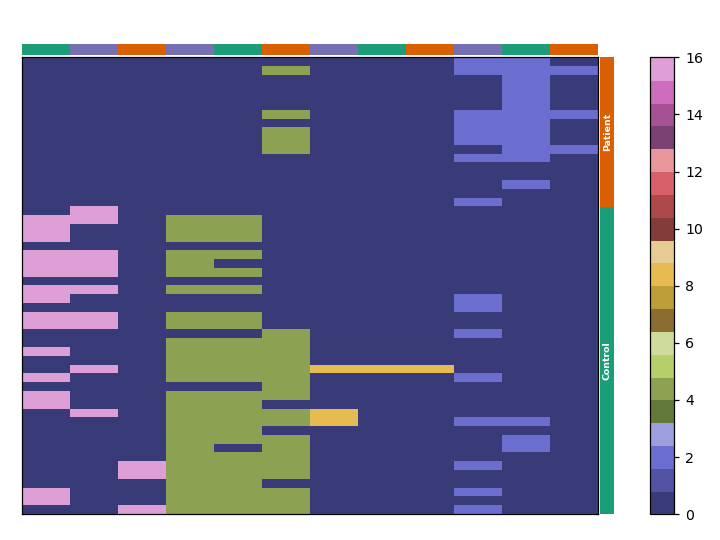

/beegfs/git/calour/calour/heatmap/heatmap.py:309: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("tab20b"))
  cmap.set_bad(bad_color)


Label(value='0 features are selected')

HTML(value='no annotation found', layout=Layout(height='100px', overflow_y='auto'))

In [15]:
term_info_exp = dbbact.show_term_details_diff('small village',dd,gui='jupyter')

### getting enriched annotations instead of terms
Each annotation is coming from a single experiment (as opposed to terms that can come from annotations in multiple experiment)

<IPython.core.display.Javascript object>


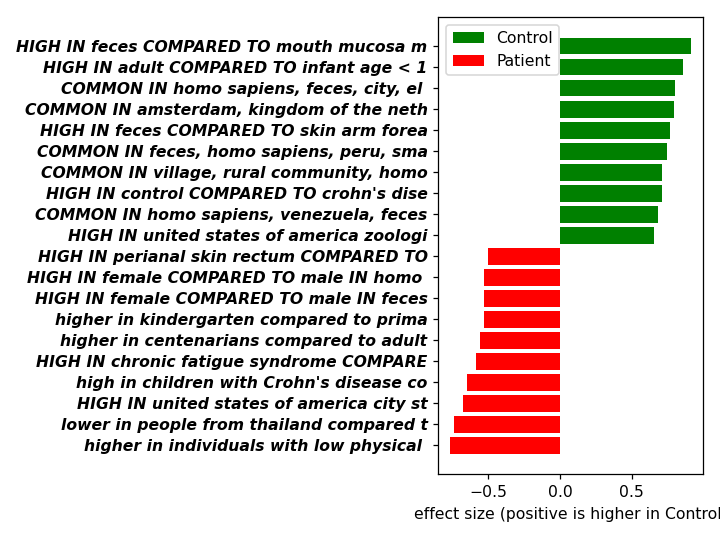

In [16]:
ax, enriched=dd.plot_diff_abundance_enrichment(term_type='annotation')

In [17]:
enriched.feature_metadata

,term,odif,pvals,num_enriched_exps,num_total_exps
higher in individuals with low physical activity (HIGH IN little physical activity COMPARED TO physical activity IN homo sapiens feces united states of america ),higher in individuals with low physical activi...,-0.764706,0.000999,-1.0,-1.0
lower in people from thailand compared to 2nd generation immigrants to usa (HIGH IN united states of america COMPARED TO thailand rural community IN homo sapiens feces ),lower in people from thailand compared to 2nd ...,-0.739496,0.000999,-1.0,-1.0
HIGH IN united states of america city state of oklahoma COMPARED TO peru small village tunapuco rural community IN feces homo sapiens adult,HIGH IN united states of america city state of...,-0.678992,0.000999,-1.0,-1.0
high in children with Crohn's disease compared to healthy adult controls (HIGH IN obsolete_juvenile stage child crohn's disease COMPARED TO control adult IN homo sapiens feces glasgow ),high in children with Crohn's disease compared...,-0.647059,0.000999,-1.0,-1.0
HIGH IN chronic fatigue syndrome COMPARED TO control IN homo sapiens feces new york county,HIGH IN chronic fatigue syndrome COMPARED TO c...,-0.588235,0.000999,-1.0,-1.0
...,...,...,...,...,...
HIGH IN feces COMPARED TO skin arm forearm IN homo sapiens child age 5-13 years bolivia rural community chuquisaca department,HIGH IN feces COMPARED TO skin arm forearm IN ...,0.769748,0.000999,-1.0,-1.0
"COMMON IN amsterdam, kingdom of the netherlands, adult, homosexual, msm, feces, homo sapiens,","COMMON IN amsterdam, kingdom of the netherland...",0.798319,0.000999,-1.0,-1.0
"COMMON IN homo sapiens, feces, city, el salvador, small village,","COMMON IN homo sapiens, feces, city, el salvad...",0.800000,0.000999,-1.0,-1.0
HIGH IN adult COMPARED TO infant age < 1 year IN homo sapiens feces india,HIGH IN adult COMPARED TO infant age < 1 year ...,0.855462,0.000999,-1.0,-1.0


### Getting both enriched terms and annotations

<IPython.core.display.Javascript object>


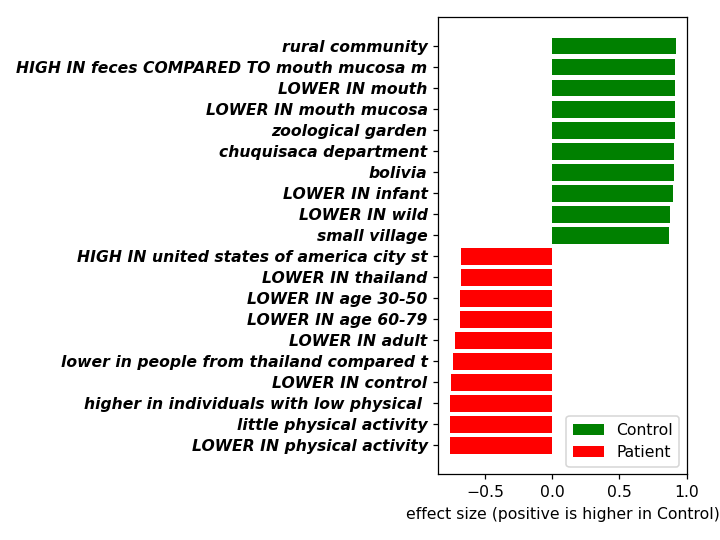

In [18]:
ax, enriched=dd.plot_diff_abundance_enrichment(term_type='combined')

In [19]:
enriched.feature_metadata

,term,odif,pvals,num_enriched_exps,num_total_exps
LOWER IN physical activity,LOWER IN physical activity,-0.764706,0.000999,-1.0,-1.0
little physical activity,little physical activity,-0.764706,0.000999,-1.0,-1.0
higher in individuals with low physical activity (HIGH IN little physical activity COMPARED TO physical activity IN homo sapiens feces united states of america ),higher in individuals with low physical activi...,-0.764706,0.000999,-1.0,-1.0
LOWER IN control,LOWER IN control,-0.756303,0.000999,-1.0,-1.0
lower in people from thailand compared to 2nd generation immigrants to usa (HIGH IN united states of america COMPARED TO thailand rural community IN homo sapiens feces ),lower in people from thailand compared to 2nd ...,-0.739496,0.000999,-1.0,-1.0
...,...,...,...,...,...
zoological garden,zoological garden,0.912605,0.000999,-1.0,-1.0
HIGH IN feces COMPARED TO mouth mucosa mouth IN homo sapiens child age 5-13 years bolivia rural community chuquisaca department,HIGH IN feces COMPARED TO mouth mucosa mouth I...,0.914286,0.000999,-1.0,-1.0
LOWER IN mouth mucosa,LOWER IN mouth mucosa,0.914286,0.000999,-1.0,-1.0
LOWER IN mouth,LOWER IN mouth,0.914286,0.000999,-1.0,-1.0


### Ignoring selected experiments already in dbBact
If our experiment is already in dbBact, or if there are other experiments in dbBact we do not want to include in the enrichment analysis, we can specify them using the `ignore_exp=[expID,...]` parameter.

In our case, the cfs experiment is already added to dbBact, so let's ignore it's annotations when doing the analysis. By looking at [dbBact.org](http://dbbact.org/main) we know its experimentID is 12. Alternatively we can use `ignore_exp=True` to automatically detect the current experimentID if it exists in dbBact (using the data and mapping file md5 hash).

<IPython.core.display.Javascript object>


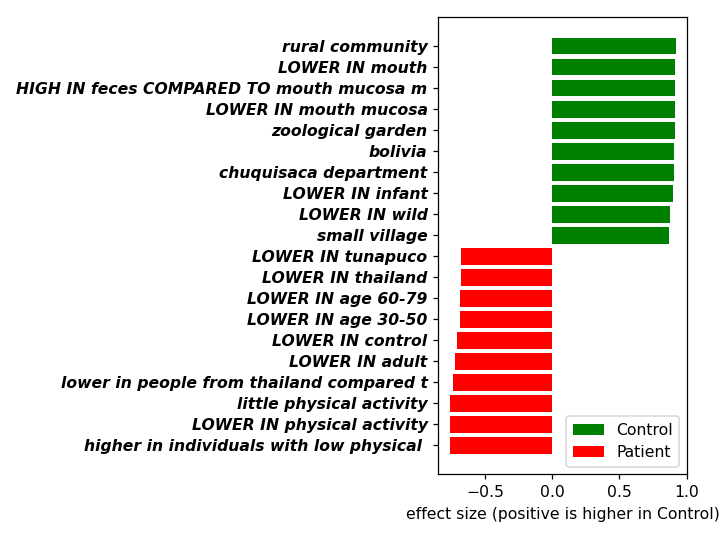

In [20]:
ax, enriched=dd.plot_diff_abundance_enrichment(term_type='combined', ignore_exp=[12])

## Adding common dbBact terms to features (`add_terms_to_features`)
We can attach to each bacteria the most common dbBact term associated with it.

The terms are selected from all of the dbBact terms, or can be selected from a supplied list.

In [21]:
cfs=cfs.add_terms_to_features(dbname='dbbact',use_term_list=['feces','saliva','skin','mus musculus'])

2020-09-11 20:17:40 INFO Getting dbBact annotations for 1100 sequences, please wait...
2020-09-11 20:17:57 INFO got 3089 annotations
2020-09-11 20:17:57 INFO Got 59592 annotation-sequence pairs
2020-09-11 20:17:57 INFO Added annotation data to experiment. Total 3089 annotations, 1100 terms


In [22]:
tt=cfs.sort_by_metadata('common_term',axis='feature')

<IPython.core.display.Javascript object>


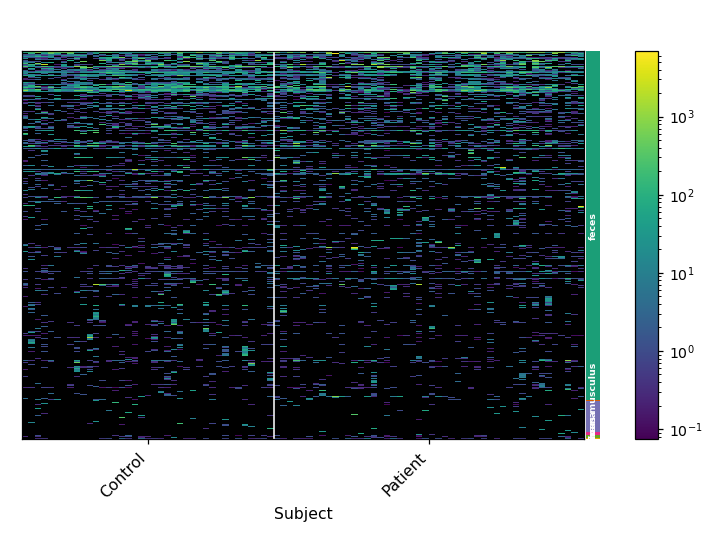

/beegfs/git/calour/calour/heatmap/heatmap.py:309: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  cmap.set_bad(bad_color)


Label(value='0 features are selected')

HTML(value='no annotation found', layout=Layout(height='100px', overflow_y='auto'))

In [23]:
tt.plot(sample_field='Subject', bary_fields=['common_term'], gui='jupyter')

## Get enriched terms using all bacteria

Instead of just comparing the bacteria enriched in the two groups (and then comparing terms between them), we can do a weighted term average for each group using all bacteria (weighing the terms of each bacteria by its' frequency in the sample). This can work if we don't have a strong set of bacteria separating between the two groups.

In [24]:
dbbact=ca.database._get_database_class('dbbact')

In [25]:
enriched=dbbact.sample_enrichment(cfs,'Subject','Control','Patient',
                                  term_type='combined',ignore_exp=[12])

2020-09-11 20:18:00 INFO 87 samples with both values
2020-09-11 20:18:00 WARNING Do you forget to normalize your data? It is required before running this function
2020-09-11 20:18:00 INFO After filtering, 5810 remain.
2020-09-11 20:18:00 INFO 39 samples with value 1 (['Control'])
2020-09-11 20:18:06 INFO number of higher in Control: 1142. number of higher in Patient : 142. total 1284


In [26]:
enriched.feature_metadata

,term,num_features,_calour_stat,_calour_pval,_calour_qval,_calour_direction
enzyme supplement,enzyme supplement,20,-1.467864,0.000999,0.006305,Patient
-non c. diff diarrhea,-non c. diff diarrhea,13,-1.467470,0.000999,0.006305,Patient
higher in patients with c. diff diarrhea compared to non-c. diff diarrhea (HIGH IN clostridium difficile intestinal infectious disease COMPARED TO non c. diff diarrhea IN homo sapiens feces australia hospital diarrhea ),higher in patients with c. diff diarrhea compa...,13,-1.467470,0.000999,0.006305,Patient
acquired immunodeficiency syndrome,acquired immunodeficiency syndrome,9,-1.340649,0.000999,0.006305,Patient
higher in antibiotics treated rats compared to controls (HIGH IN antibiotic neomycin ampicillin COMPARED TO control IN rat rattus norvegicus sprague dawley feces caecum research facility switzerland ),higher in antibiotics treated rats compared to...,21,-1.311713,0.000999,0.006305,Patient
...,...,...,...,...,...,...
-gangcha region,-gangcha region,70,1.432247,0.001998,0.011023,Control
HIGH IN gannan tibetan autonomous prefecture COMPARED TO gangcha region IN tibet autonomous region feces homo sapiens tibetan plateau adult,HIGH IN gannan tibetan autonomous prefecture C...,70,1.432247,0.001998,0.011023,Control
HIGH IN hiv infection COMPARED TO control IN united states of america feces homo sapiens,HIGH IN hiv infection COMPARED TO control IN u...,45,1.496605,0.001998,0.011023,Control
HIGH IN gay homosexual msm COMPARED TO heterosexual msw IN homo sapiens feces united states of america adult state of colorado city,HIGH IN gay homosexual msm COMPARED TO heteros...,71,1.506088,0.000999,0.006305,Control
